In [116]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

file = "/Users/hamilton/Documents/GitHub/DHPC/"

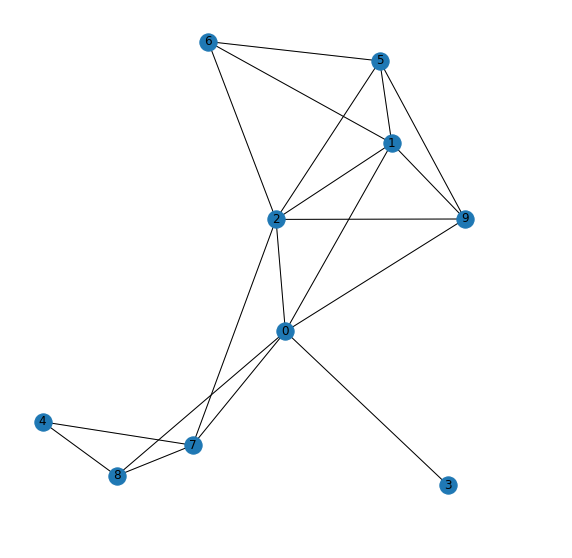

In [122]:
nver = 10
G = nx.random_geometric_graph(n=nver, radius=0.5, dim=2, pos=None)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, 'pos')
H = G.subgraph(range(10))

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0

s  = (len(pos),3)
n_x_y = np.zeros(s)
s = (len(pos),nver-1)
NN_array = -1*np.ones(s)
 
for n in pos:
    x, y = pos[n]
    
    n_x_y[n,0]=int(n)
    n_x_y[n,1]=x
    n_x_y[n,2]=y
    
    a = np.array(list(G.neighbors(n)))
    NN_array[n,0:len(a)] = a 
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

        
n_x_y_NN = np.concatenate((n_x_y,NN_array),axis=1)

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

np.savetxt(file+'map.dat',n_x_y_NN, delimiter=' ', fmt='%4g')   

plt.figure(figsize=(10, 10))
nx.draw_networkx(H, pos=pos)
nx.draw_networkx_edges(G, pos, 
                       nodelist=[ncenter], 
                       alpha=0.1)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=50,
                       #node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()



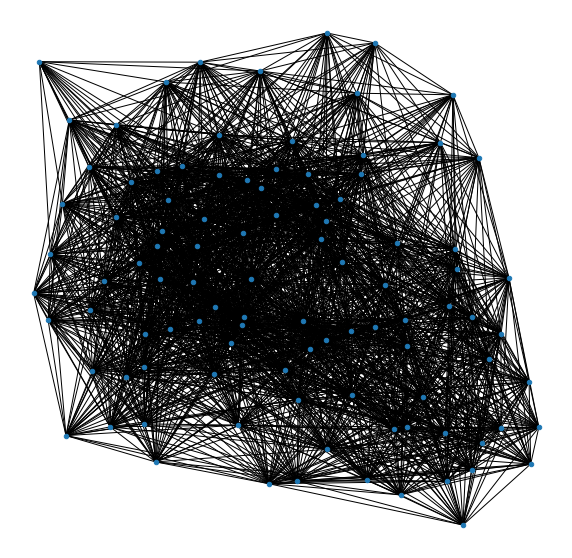

In [108]:
# write edgelist to grid.edgelist
nx.write_edgelist(G, path=file+"grid.edgelist", delimiter=":", data=True)
# read edgelist from grid.edgelist
T = nx.read_edgelist(path=file+"grid.edgelist", delimiter=":", data=True)
#B = nx.Graph(T)
#B.add_edge(T) 

pos = nx.get_node_attributes(T, 'pos')
H = B.subgraph(range(10))

plt.figure(figsize=(10, 10))
#nx.draw_networkx(H, pos=pos)
#nx.draw_networkx_edges(T)
#nx.draw_random(T, with_labels = True) 
#pos = nx.get_node_attributes(T, 'pos')
#H = G.subgraph(range(10))
nx.draw_networkx(H, pos=pos)
nx.draw(T,node_size=20)
plt.show()

a:
[[1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0.]]
U nodes: [0 1 2 3 4 5 6]
V nodes: [ 7  8  9 10 11]
edges


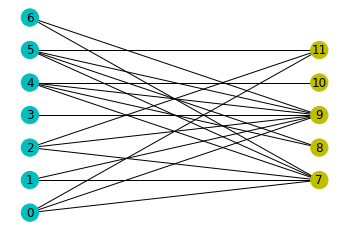

In [113]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Load the adjacency matrix into a numpy array.
a = np.loadtxt(file+'matrix.txt')

print ("a:")
print (a)

num_nodes = a.shape[0] + a.shape[1]

# Get the row and column coordinates where the array is 1.
rows, cols = np.where(a == 1)

# We label the nodes corresponding to the rows with integers from 0 to
# a.shape[0]-1, and we label the nodes corresponding to the columns with
# integers from a.shape[0] to a.shape[0] + a.shape[1] - 1.
# Rearranges the list of rows and columns into a list of edge tuples.
edges = zip(rows.tolist(), (cols + a.shape[0]).tolist())
print ("U nodes:", np.arange(a.shape[0]))
print ("V nodes:", np.arange(a.shape[1]) + a.shape[0])
print ("edges")
print (edges)

# Create a Graph object (from the networkx library).
b = nx.Graph()
b.add_nodes_from(range(num_nodes))  # This line not strictly necessry.
b.add_edges_from(edges)

# Draw the graph.  First create positions for each node. Put the U nodes
# on the left (x=1) and the V nodes on the right (x=2).
pos = dict([(k, (1, k - 0.5 * a.shape[0]))
            for k in range(a.shape[0])])
pos.update(dict([(k + a.shape[0], (2, k - 0.5 * a.shape[1]))
                  for k in range(a.shape[1])]))
nx.draw_networkx(b, pos=pos, node_color=(['c'] * a.shape[0]) + (['y'] * a.shape[1]))

plt.axis('off')
plt.show()
